In [37]:
pip install numpy pandas scikit-learn tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


# Heart Disease Prediction

In this machine learning project, I have collected the dataset and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

# Import Libraries

Let's first import all the necessary libraries.

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Input

# Load Dataset

I can import the dataset and dataset is stored in the file heart.csv. I'll use the pandas read_csv method to read the dataset.

In [40]:
data = pd.read_csv("heart.csv")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value

In [42]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

# Exploratory Data Analysis (EDA)

### Target Variable Distribution

The target variable distribution shows that the dataset is nearly balanced between patients with and without heart disease. This balance helps in reducing model bias during training.

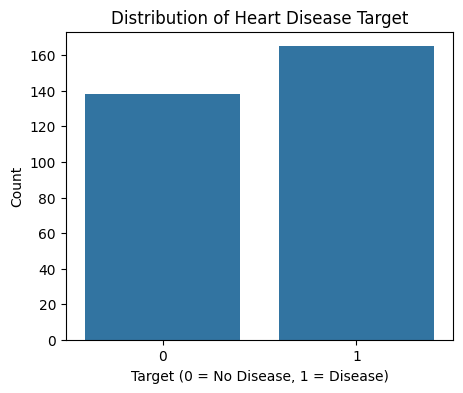

In [44]:
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease Target")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

### Heart Rate vs Heart Disease

The box plot analysis indicates that patients with heart disease generally achieve lower maximum heart rates compared to healthy individuals. This feature appears to be an important indicator.

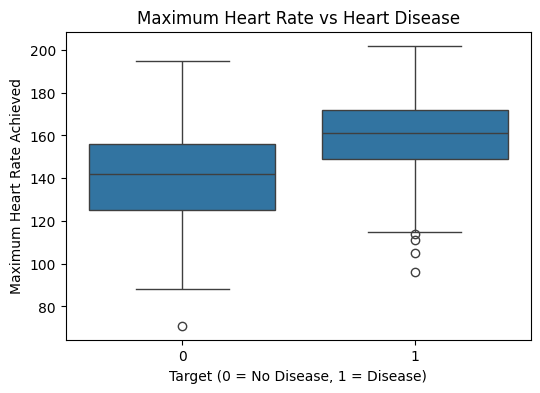

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Maximum Heart Rate vs Heart Disease")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

### Chest Pain Types vs Heart Disease

Certain chest pain types are more strongly associated with heart disease. This suggests that chest pain type plays a significant role in diagnosis.

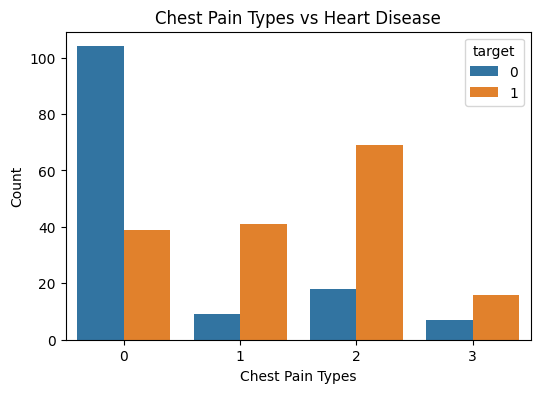

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Types vs Heart Disease")
plt.xlabel("Chest Pain Types")
plt.ylabel("Count")
plt.show()

### Correlation Heatmap

A correlation heatmap was used to examine relationships between features. Variables such as chest pain type, maximum heart rate, and ST depression show strong correlations with the target variable.

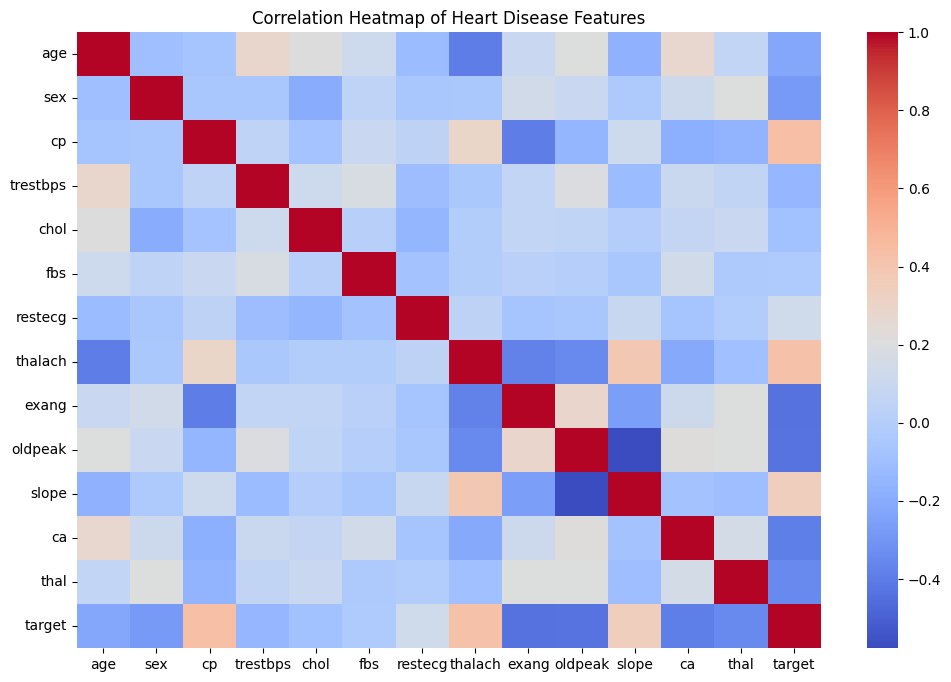

In [48]:
plt.figure(figsize=(12,8))
correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Heart Disease Features")
plt.show()

# Split Features & Target

I'll now import train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [49]:
X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling for SVM & ANN

Feature scaling is an essential preprocessing step in machine learning, especially when using algorithms that rely on distance-based calculations or gradient-based optimization techniques. The clinical variables in the Heart Disease dataset (such as cholesterol, blood pressure, age, and maximum heart rate) are measured on different scales.

Standardization is applied using StandardScaler, which transforms each feature to have:

Mean = 0

Standard deviation = 1

This ensures that all variables contribute equally to the model during training.

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
## 1. Support Vector Machine (SVM)
Support Vector Machine (SVM) is a powerful supervised learning algorithm commonly used for classification tasks. It works by identifying the optimal hyperplane that best separates data points of different classes.

In heart disease prediction, SVM is effective due to its ability to model non-linear relationships and handle high-dimensional feature spaces.

In [58]:
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train_scaled, y_train)

svm_pred = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred)*100)
print("Classification Report: \n", classification_report(y_test, svm_pred))

SVM Accuracy: 86.88524590163934
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## 2. Decision Tree

A Decision Tree is a supervised learning algorithm that splits data into branches based on feature values, forming a flow-chart-like structure.

It is widely used in healthcare applications because it provides high interpretability, allowing clinicians to understand why a particular prediction was made.

In [59]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred)*100)
print("Classification Report: \n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 81.9672131147541
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## 3. Artificial Neural Network (ANN)

Artificial Neural Networks mimic the human brain structure and are highly effective for modelling complex relationships in this data.

In [62]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)
y_pred_prob = model.predict(X_test_scaled)

# Convert to class labels
y_pred = (y_pred_prob >= 0.5).astype(int).ravel()

ann_loss, ann_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print("ANN Accuracy:", ann_acc*100)
print("ANN Classification Report:\n", classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
ANN Accuracy: 85.24590134620667
ANN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Confusion Matrices

A confusion matrix provides a detailed summary of model predictions by showing:

True Positive (TP)	Correctly predicted disease

True Negative (TN)	Correctly predicted no disease

False Positive (FP)	Predicted disease but patient is healthy

False Negative (FN)	Predicted healthy but patient has disease

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


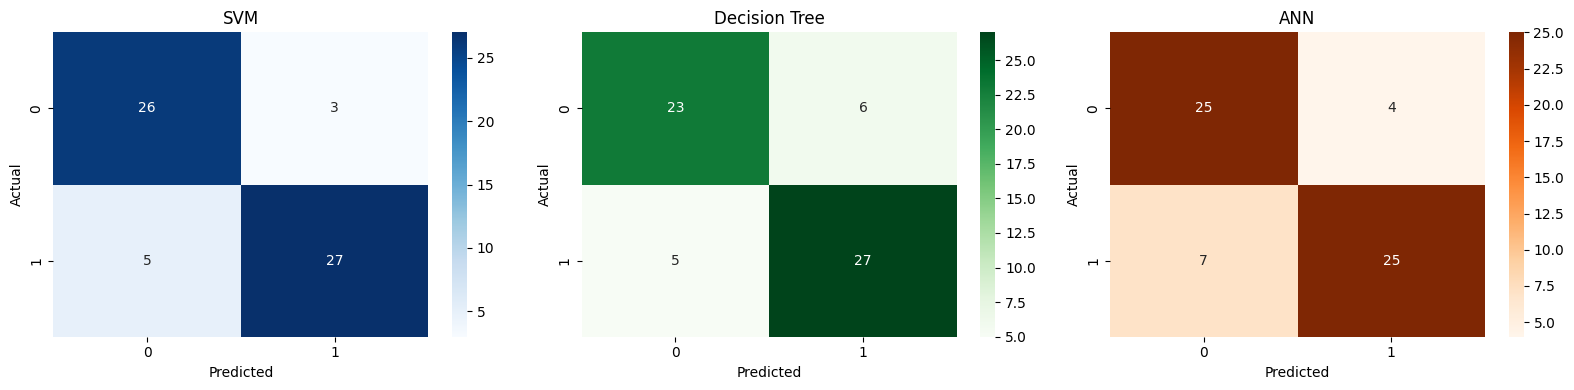

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

# SVM
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap="Blues", fmt="d", ax=ax[0])
ax[0].set_title("SVM")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# Decision Tree
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap="Greens", fmt="d", ax=ax[1])
ax[1].set_title("Decision Tree")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

# ANN
ann_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
sns.heatmap(confusion_matrix(y_test, ann_pred), annot=True, cmap="Oranges", fmt="d", ax=ax[2])
ax[2].set_title("ANN")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()
